# data acquisition / processing homework 2

> I pledge my Honor that I have abided by the Stevens Honor System. - Joshua Schmidt 2/27/21


## Problem 1

a. For a stationary AR(1) time series x(t), x(t) is uncorrelated to x(t-l) for l>=2.

This is false. For AR(1), $x(t) = a_0 + a_1 \cdot x(t - 1) + \epsilon_t$. In this expression, $x(t)$ is correlated to $x(t - 1)$, with a value of $a_1$. $x(t - 1)$ can be expanded to $a_0 + a_1 \cdot x(t - 2) + \epsilon_{t - 1}$, with a correlation of $a_1^2$. Subsequent members or the series can be expanded, for any value of l. Therefore, for all values of l>=2, $x(t)$ is correlated to $x(t-l)$.

b. For a stationary MA(1) time series x(t), you will observe a coefficient cliff after time lag l>=1 in the ACF plot.

This is true. In the ACF plot, there is decrease in the coefficients when lagging the time by 1>=1 in the plot. This is because noise is uncorrelated, and contains no information. ACF(K) = 0.

## Problem 2

Find the best predictive model for each of the time series, using the techniques in the lecture.


In [68]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [10]:
q2_data = pd.read_csv('./q2.csv', header=None)
print('question 2 samples:')
q2_data.head()

question 2 samples:


,0
0,0.8512
1,-2.0698
2,0.8185
3,-1.0678
4,2.3753


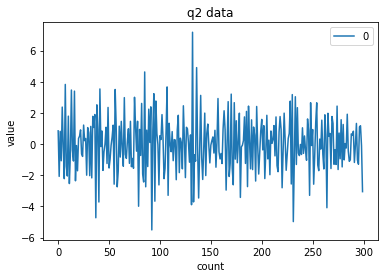

In [20]:
q2_plot = sns.lineplot(data=q2_data)
q2_plot.set_title('q2 data')
q2_plot.set(xlabel='count', ylabel='value')
plt.show()
# graph looks stationary, not much variance

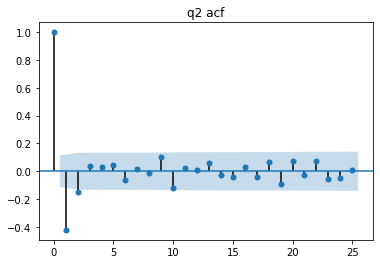

In [26]:
plot_acf(q2_data, title='q2 acf')
plt.show()

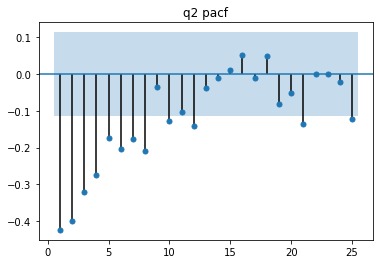

In [66]:
plot_pacf(q2_data, title='q2 pacf', zero=False)
plt.show()

Looking at these plots, the acf quickly converges towards 0 (like a cliff), but the pacf takes a lag of 9 before finally converging towards 0 (it is gradual). Therefore, the best predictive model of this time series is most likely an MA model, maybe moving average of 2.

In [55]:
q2_model = ARIMA(q2_data, order=(0, 0, 4))
q2_model_fit = q2_model.fit()
q2_model_fit.summary()

/home/joshua/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                  300
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -482.918
Date:                Sat, 27 Feb 2021   AIC                            977.835
Time:                        19:59:42   BIC                           1000.058
Sample:                             0   HQIC                           986.729
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.280      0.780      -0.001       0.002
ma.L1         -1.1297      0.676     -1.672      0.095      -2.454       0.195
ma.L2         -0.1248      0.129     -0.969      0.333      -0.377       0.128
ma.L3          0.1881      0.173      1.085      0.278      -0.152       0.528
ma.L4          0.0665      0.074      0.901      0.368      -0.078       0.211
sigma2         1.4302      0.976      1.465      0.143      -0.483       3.343
===================================================================================
Ljung-Box (Q):                       40.64   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.44   Prob(JB):                         0.52
Heteroskedasticity (H):               0.69   Skew:                             0.15
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

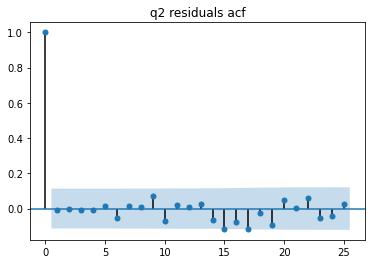

In [56]:
q2_residuals = pd.DataFrame(q2_model_fit.resid)
plot_acf(q2_residuals, title='q2 residuals acf')
plt.show()

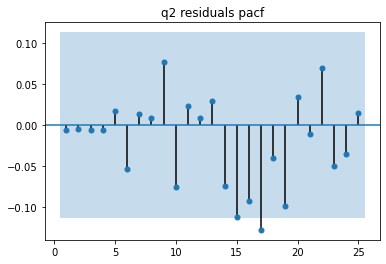

In [57]:
plot_pacf(q2_residuals, title='q2 residuals pacf', zero=False)
plt.show()

In [61]:
q3_data = pd.read_csv('./q3.csv', header=None)
print('question 3 samples:')
q3_data.head()

question 3 samples:


,0
0,1.0374
1,1.0372
2,1.0372
3,1.0370
4,1.0369


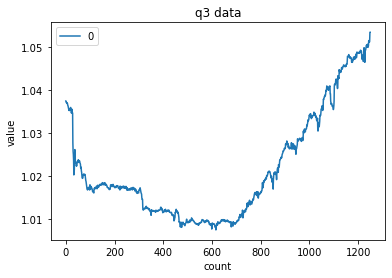

In [63]:
q3_plot = sns.lineplot(data=q3_data)
q3_plot.set_title('q3 data')
q3_plot.set(xlabel='count', ylabel='value')
plt.show()
# graph does not look stationary

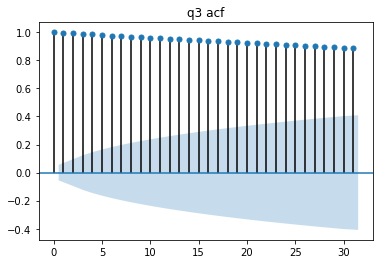

In [64]:
plot_acf(q3_data, title='q3 acf')
plt.show()

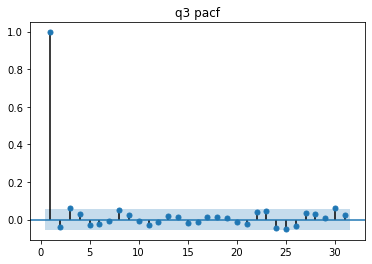

In [67]:
plot_pacf(q3_data, title='q3 pacf', zero=False)
plt.show()

Looking at these plots, the acf does not converge to 0, but instead slowly decreases in value while the pacf quickly converges towards 0 (like a cliff). This suggests that there are correlation values, and it is not a statistical fluke.

In [69]:
q3_model = ARIMA(q3_data, order=(3, 1, 2))
q3_model_fit = q3_model.fit()
q3_model_fit.summary()

/home/joshua/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                 1250
Model:                 ARIMA(3, 1, 2)   Log Likelihood                7823.251
Date:                Sat, 27 Feb 2021   AIC                         -15634.502
Time:                        20:10:06   BIC                         -15603.721
Sample:                             0   HQIC                        -15622.930
                               - 1250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2471      0.008     31.900      0.000       0.232       0.262
ar.L2         -0.7534      0.006   -126.410      0.000      -0.765      -0.742
ar.L3          0.0576      0.013      4.325      0.000       0.031       0.084
ma.L1         -0.0471      0.009     -5.181      0.000      -0.065      -0.029
ma.L2          0.6720      0.005    130.813      0.000       0.662       0.682
sigma2      2.106e-07   1.72e-09    122.559      0.000    2.07e-07    2.14e-07
===================================================================================
Ljung-Box (Q):                       93.07   Jarque-Bera (JB):            138075.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -2.56
Prob(H) (two-sided):                  0.16   Kurtosis:                        54.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.35e+17. Standard errors may be unstable.
"""

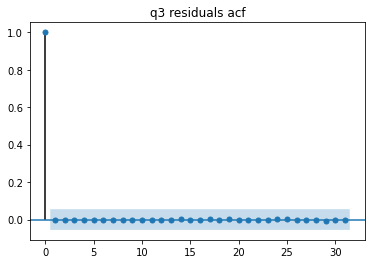

In [70]:
q3_residuals = pd.DataFrame(q3_model_fit.resid)
plot_acf(q3_residuals, title='q3 residuals acf')
plt.show()

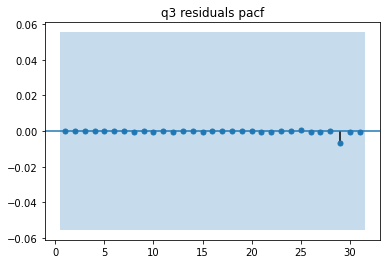

In [71]:
plot_pacf(q3_residuals, title='q3 residuals pacf', zero=False)
plt.show()